<a href="https://colab.research.google.com/github/jpshimidt/DataScience/blob/main/Dia_3_BOOTCAMP_Coleta_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coleta de Dados - DIA 3 - BOOTCAMP DATAVIKINGS

## Exemplo de utilização com uma API para coleta e consumo de DADOS

In [1]:
#Importando Libs
import requests
from pandas import DataFrame

In [2]:
# Exemplo do uso de uma API para coleta de dados
Conexao = requests.get(f'https://viacep.com.br/ws/02247000/json/')
Retorno = Conexao.json()

Retorno

{'bairro': 'Parada Inglesa',
 'cep': '02247-000',
 'complemento': '',
 'ddd': '11',
 'gia': '1004',
 'ibge': '3550308',
 'localidade': 'São Paulo',
 'logradouro': 'Rua Borges',
 'siafi': '7107',
 'uf': 'SP'}

In [3]:
# Organizando o dictionary em um Data Frame
DataFrame(Retorno, index=[0])

,cep,logradouro,complemento,bairro,localidade,uf,ibge,gia,ddd,siafi
0,02247-000,Rua Borges,,Parada Inglesa,São Paulo,SP,3550308,1004,11,7107


In [4]:
#Funcao para buscar CEO
def Buscar_CEP(Numero_CEP) :

  # Recebe o valor da Funçao
  Valor = str(Numero_CEP)

  #Conexão
  Conexao = requests.get(f'https://viacep.com.br/ws/{Valor}/json/')

  #Armazena o retorno e converte para um dicionario
  Retorno = Conexao.json()

  # Ler o dicionario e converter para uma tabela
  Base = DataFrame(Retorno, index=[0])

  return Base

In [5]:
#Lista com CEPS
Lista_Ceps = ['02247000','09132240']

#Loop para buscar os CEPS
for Loop in Lista_Ceps :
  try:
    print(Buscar_CEP(Loop))

  except:
    print('Deu errado')

         cep  logradouro complemento          bairro  ...     ibge   gia ddd siafi
0  02247-000  Rua Borges              Parada Inglesa  ...  3550308  1004  11  7107

[1 rows x 10 columns]
         cep  logradouro complemento      bairro  ...     ibge   gia ddd siafi
0  09132-240  Rua Celina              Vila Suíça  ...  3547809  6269  11  7057

[1 rows x 10 columns]


##Web Scraping = Extracao + Manual

In [6]:
#Importando libs
from bs4 import BeautifulSoup

In [7]:
# Endereço site
Site = 'http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx'

#Conexao
Pagina = requests.get(Site)

#Verificando a conexao
print(Pagina)

<Response [200]>


In [8]:
#Coletando as informações da página
Coleta = BeautifulSoup(Pagina.text,'html.parser')

#Exemplo - Acessando o titulo
print(Coleta.title)
print(Coleta.title.name)
print(Coleta.title.string)

<title>
	SSP
</title>
title

	SSP



In [9]:
# Localizar todas as tabelas
Tabelas = Coleta.find_all('table', attrs={'class': 'table table-striped table-hover table-condensed'} )

# Verificando
print( f'Foram localizadas: {len(Tabelas)} tabelas' )

Foram localizadas: 124 tabelas


In [10]:
# Listas pata guardar valores
Rotulos = []
Dados = []
Periodo = []

# Variavel de Apoio
Loop = 0

for Consulta in Tabelas:
  
  # Localizar a linha da tabela
  Linha = Consulta.find_all('tr')[2]

  # acessando o Rotulo
  Rotulo = Linha.find_all('td')[0].text

  # acessando a Informação
  Informacao = Linha.find_all('span')[0].text

  if Rotulo == 'FEMINICÍDIO':
    Rotulos.append( Rotulo )
    Dados.append( Informacao )

  else:
    pass

In [11]:
# Criar um Dicionaio
Dicionario = {
    'Rotulo' : Rotulos,
    'Quantidade' : Dados
}

# Criando a tabela
Base_Dados = DataFrame( Dicionario )

# Verificando
Base_Dados

,Rotulo,Quantidade
0,FEMINICÍDIO,10
1,FEMINICÍDIO,9
2,FEMINICÍDIO,9
3,FEMINICÍDIO,6
4,FEMINICÍDIO,8
5,FEMINICÍDIO,8
6,FEMINICÍDIO,7
7,FEMINICÍDIO,26
8,FEMINICÍDIO,10
9,FEMINICÍDIO,21


## Introdução ao Pandas

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

### Criando um DataFrame

<img src = 'https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg'/>

In [13]:
dados = {
    'idCliente': [1, 2, 3, 4, 5],
    'Nome': ['Aline', 'Emeson', 'Jean', 'Rafael', 'João'],
    'Idade': np.random.randint(18, 30, size = 5),
    'Score ': np.random.uniform(0, 10, size = 5),
    'Churn': np.random.choice([0, 1], size = 5)
}

In [14]:
df = pd.DataFrame(dados)

In [15]:
df

,idCliente,Nome,Idade,Score,Churn
0,1,Aline,24,8.642448,1
1,2,Emeson,28,3.644802,0
2,3,Jean,18,0.516495,0
3,4,Rafael,25,4.059614,0
4,5,João,19,1.011963,0


In [16]:
df.to_csv('dados_cliente.csv', index = False)

In [17]:
df = pd.read_csv('dados_cliente.csv')

In [18]:
df['Cidade'] = ['Salvador', 'Rio de Janeiro', 'São Paulo', 'Belo Horizonte', 'Curitiba']

In [19]:
df.head(1)

,idCliente,Nome,Idade,Score,Churn,Cidade
0,1,Aline,24,8.642448,1,Salvador


In [20]:
df.tail(1)

,idCliente,Nome,Idade,Score,Churn,Cidade
4,5,João,19,1.011963,0,Curitiba


In [21]:
#df.loc[linha, coluna]

In [22]:
df.loc[:, 'Idade']

0    24
1    28
2    18
3    25
4    19
Name: Idade, dtype: int64

In [23]:
df.Idade

0    24
1    28
2    18
3    25
4    19
Name: Idade, dtype: int64

In [24]:
df['Idade']

0    24
1    28
2    18
3    25
4    19
Name: Idade, dtype: int64

In [25]:
df['Score ']

0    8.642448
1    3.644802
2    0.516495
3    4.059614
4    1.011963
Name: Score , dtype: float64

In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
type(df.Idade)

pandas.core.series.Series

In [28]:
df.columns

Index(['idCliente', 'Nome', 'Idade', 'Score ', 'Churn', 'Cidade'], dtype='object')

In [29]:
df.rename(columns = {'Score ':'Score_1'})

,idCliente,Nome,Idade,Score_1,Churn,Cidade
0,1,Aline,24,8.642448,1,Salvador
1,2,Emeson,28,3.644802,0,Rio de Janeiro
2,3,Jean,18,0.516495,0,São Paulo
3,4,Rafael,25,4.059614,0,Belo Horizonte
4,5,João,19,1.011963,0,Curitiba


In [30]:
df.rename(columns = {'Score ':'Score_1'}, inplace = True)

### Trabalhando com dados sintéticos

In [31]:
df = gerar_dados(10000)

In [32]:
# 5 primeiras linhas
df.head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,1,Ilhéus,Masculino,31,3792,Ensino Médio,7.58,Advogado,8
1,2,Lauro de Freitas,Feminino,30,8387,Ensino Fundamental,6.21,Engenheiro de Dados,24
2,3,Feira de Santana,Feminino,31,2423,Ensino Superior,6.74,Contador,7
3,4,Salvador,Masculino,26,3895,Ensino Médio,7.72,Cientista de Dados,16
4,5,Ilhéus,Masculino,59,8183,Ensino Superior,4.16,Professor,6


In [33]:
# 5 últimas linhas
df.tail()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
9995,9996,Ilhéus,Masculino,46,9604,Ensino Fundamental,7.69,Advogado,17
9996,9997,Porto Seguro,Feminino,41,1751,Ensino Fundamental,1.63,Professor,3
9997,9998,Lauro de Freitas,Masculino,23,7882,Ensino Médio,3.86,Contador,18
9998,9999,Itabuna,Não Informado,27,4406,Ensino Fundamental,0.79,Bancário,3
9999,10000,Feira de Santana,Não Informado,37,4800,Ensino Fundamental,0.30,Economista,13


In [34]:
# quantidade de linhas e colunas
df.shape

(10000, 9)

In [35]:
type(df.shape)

tuple

In [36]:
# colunas
df.columns

Index(['id', 'cidade', 'sexo', 'idade', 'renda', 'escolaridade', 'score',
       'profissao', 'tempo_empregado'],
      dtype='object')

In [37]:
# informações genéricas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   cidade           10000 non-null  object 
 2   sexo             10000 non-null  object 
 3   idade            10000 non-null  int64  
 4   renda            10000 non-null  int64  
 5   escolaridade     10000 non-null  object 
 6   score            10000 non-null  float64
 7   profissao        10000 non-null  object 
 8   tempo_empregado  10000 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 703.2+ KB


In [38]:
# índice
df.index

RangeIndex(start=0, stop=10000, step=1)

In [39]:
# sumário estatística
df.describe()

,id,idade,renda,score,tempo_empregado
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.874200,5524.664100,5.021727,15.015000
std,2886.89568,13.657541,2605.282282,2.893446,8.359555
min,1.00000,18.000000,1000.000000,0.000000,1.000000
25%,2500.75000,29.000000,3262.500000,2.510000,8.000000
50%,5000.50000,41.000000,5565.500000,5.040000,15.000000
75%,7500.25000,53.000000,7772.500000,7.530000,22.000000
max,10000.00000,64.000000,9998.000000,10.000000,29.000000


In [40]:
df.describe(include = 'all')

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
count,10000.00000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000
unique,NaN,6,3,NaN,NaN,3,NaN,8,NaN
top,NaN,Itabuna,Não Informado,NaN,NaN,Ensino Médio,NaN,Economista,NaN
freq,NaN,1728,3354,NaN,NaN,3370,NaN,1317,NaN
mean,5000.50000,NaN,NaN,40.874200,5524.664100,NaN,5.021727,NaN,15.015000
std,2886.89568,NaN,NaN,13.657541,2605.282282,NaN,2.893446,NaN,8.359555
min,1.00000,NaN,NaN,18.000000,1000.000000,NaN,0.000000,NaN,1.000000
25%,2500.75000,NaN,NaN,29.000000,3262.500000,NaN,2.510000,NaN,8.000000
50%,5000.50000,NaN,NaN,41.000000,5565.500000,NaN,5.040000,NaN,15.000000
75%,7500.25000,NaN,NaN,53.000000,7772.500000,NaN,7.530000,NaN,22.000000


In [41]:
# contar a quantidade de valores únicos por coluna
df.nunique()

id                 10000
cidade                 6
sexo                   3
idade                 47
renda               6072
escolaridade           3
score               1001
profissao              8
tempo_empregado       29
dtype: int64

In [42]:
# valores únicos da coluna 'profissao'
df['profissao'].unique()

array(['Advogado', 'Engenheiro de Dados', 'Contador',
       'Cientista de Dados', 'Professor', 'Físico', 'Economista',
       'Bancário'], dtype=object)

In [43]:
# valores únicos da coluna 'cidade'
df['cidade'].unique()

array(['Ilhéus', 'Lauro de Freitas', 'Feira de Santana', 'Salvador',
       'Porto Seguro', 'Itabuna'], dtype=object)

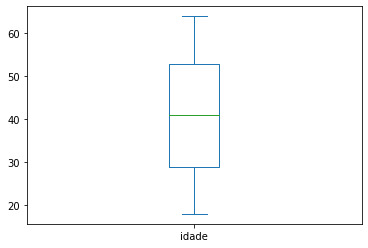

In [44]:
df.idade.plot(kind = 'box');

In [45]:
# filtro do tempo de empregado
df[df['tempo_empregado'] == 29]

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
13,14,Salvador,Masculino,51,8033,Ensino Médio,5.61,Engenheiro de Dados,29
92,93,Ilhéus,Não Informado,54,5515,Ensino Superior,2.88,Engenheiro de Dados,29
140,141,Lauro de Freitas,Feminino,41,9932,Ensino Superior,5.66,Cientista de Dados,29
183,184,Ilhéus,Feminino,58,5147,Ensino Médio,1.77,Contador,29
204,205,Itabuna,Masculino,42,7520,Ensino Superior,4.34,Professor,29
...,...,...,...,...,...,...,...,...,...
9762,9763,Ilhéus,Masculino,64,4885,Ensino Superior,9.73,Cientista de Dados,29
9776,9777,Itabuna,Masculino,56,2531,Ensino Fundamental,1.96,Professor,29
9885,9886,Salvador,Masculino,53,6560,Ensino Médio,8.07,Físico,29
9923,9924,Feira de Santana,Masculino,59,6964,Ensino Médio,5.05,Professor,29


In [46]:
# filtra o dataset para a cidade de Salvador
base_clientes_salvador = df[df.cidade == 'Salvador']

In [47]:
# agrupa por gênero e faz o cálculo da média
base_clientes_salvador.groupby(by = ['sexo'])['idade'].mean()

sexo
Feminino         41.425447
Masculino        39.756614
Não Informado    40.024209
Name: idade, dtype: float64

In [48]:
# proporção entre os valores
df.cidade.value_counts(normalize = True) *100

Itabuna             17.28
Ilhéus              17.16
Porto Seguro        17.04
Feira de Santana    16.41
Salvador            16.07
Lauro de Freitas    16.04
Name: cidade, dtype: float64

In [49]:
# proporção entre os valores
df.profissao.value_counts(1) * 100

Economista             13.17
Advogado               12.84
Contador               12.48
Bancário               12.46
Físico                 12.45
Cientista de Dados     12.40
Professor              12.14
Engenheiro de Dados    12.06
Name: profissao, dtype: float64